In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


The best k = 8, score = 1.0000


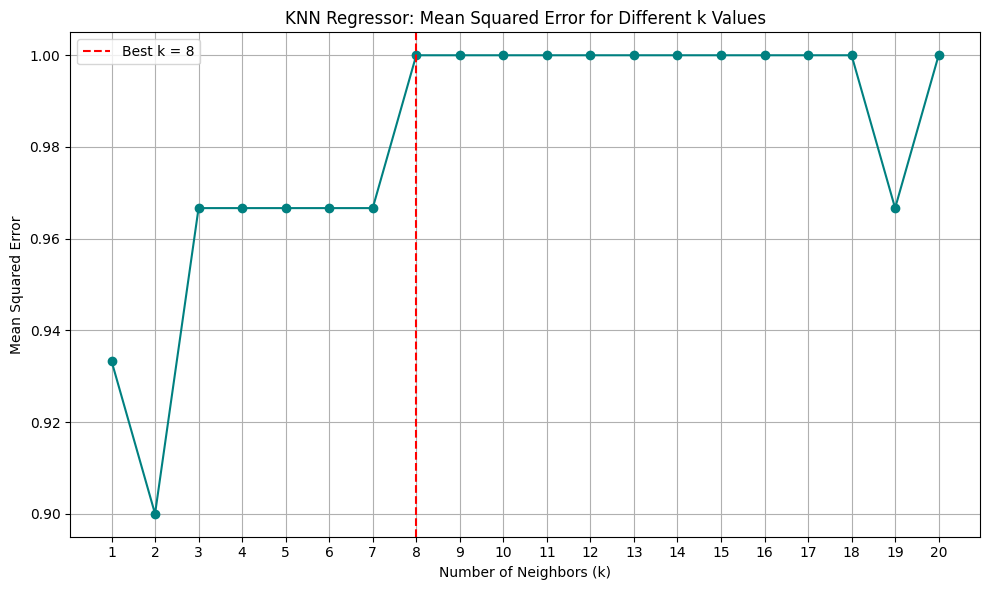

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

score_list = []

best_k = None
best_score = 0

for k in range(1, 21):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    score_list.append(score)

    if score > best_score:
        best_score = score
        best_k = k
        

print('The best k = {}, score = {:.4f}'.format(best_k, best_score))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), score_list, marker='o', linestyle='-', color='teal')
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title('KNN Regressor: Mean Squared Error for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1,21))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

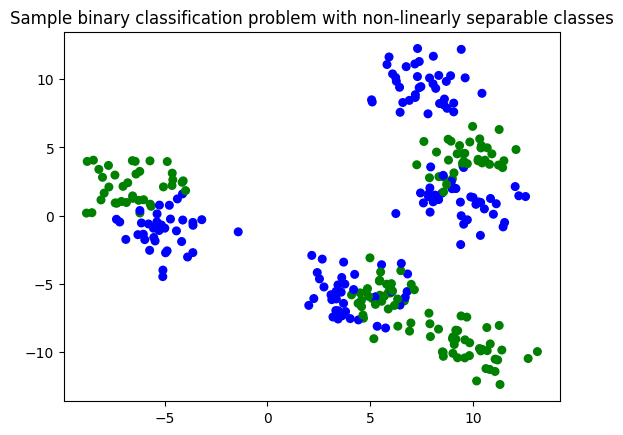

In [57]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

The best k = 3, score = 0.0593


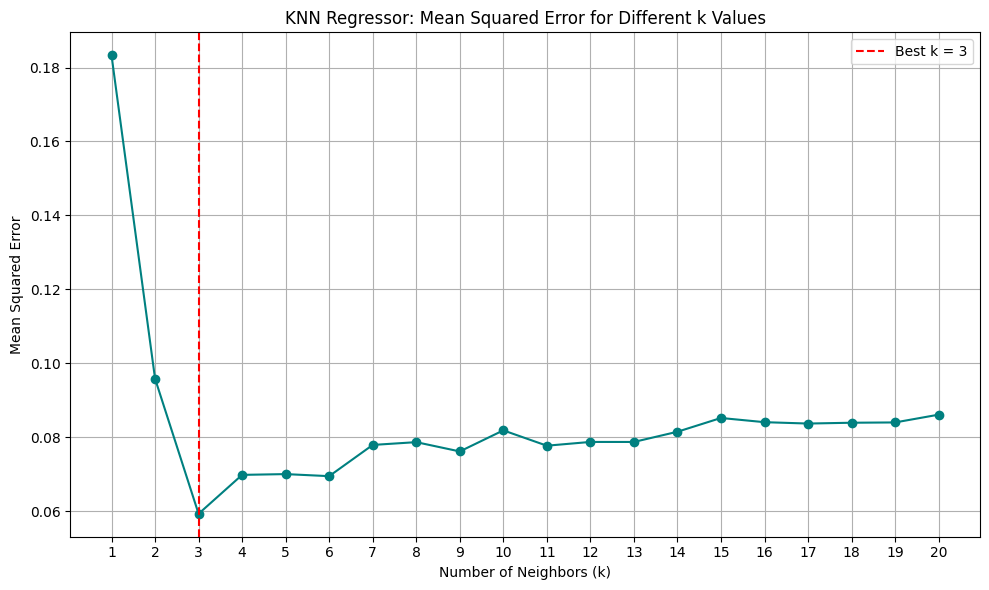

In [58]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=2021)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mse_scores = []
k_values = range(1, 21)
best_k = None
best_score = float('inf')

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score = mean_squared_error(y_test, y_pred)
    mse_scores.append(score)
    
    if score < best_score:
        best_score = score
        best_k = k
        best_model = knn

print('The best k = {}, score = {:.4f}'.format(best_k, best_score))

plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-', color='teal')
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title('KNN Regressor: Mean Squared Error for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


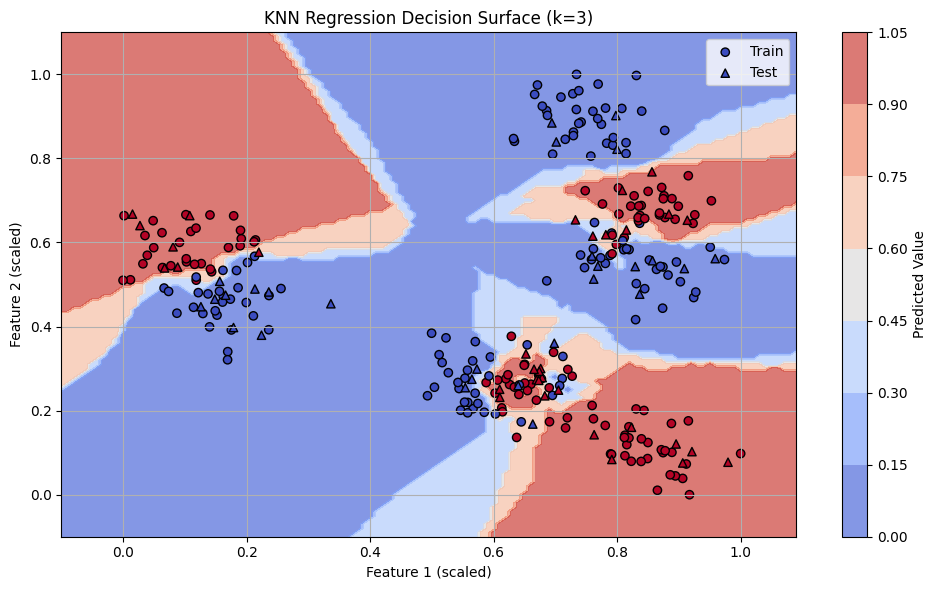

In [59]:
h = 0.01  
x_min, x_max = X_train_scaled[:, 0].min() - 0.1, X_train_scaled[:, 0].max() + 0.1
y_min, y_max = X_train_scaled[:, 1].min() - 0.1, X_train_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_model.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.7)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label='Train')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='^', label='Test')
plt.colorbar(contour, label='Predicted Value')
plt.title(f'KNN Regression Decision Surface (k={best_k})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()